<a href="https://colab.research.google.com/github/ClaudioAMF1/Machine-Learning/blob/main/california_Claudio_Meireles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Análise Exploratória de Dados (EDA)

Dimensões do dataset: (20640, 9)

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Estatísticas descritivas:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822    

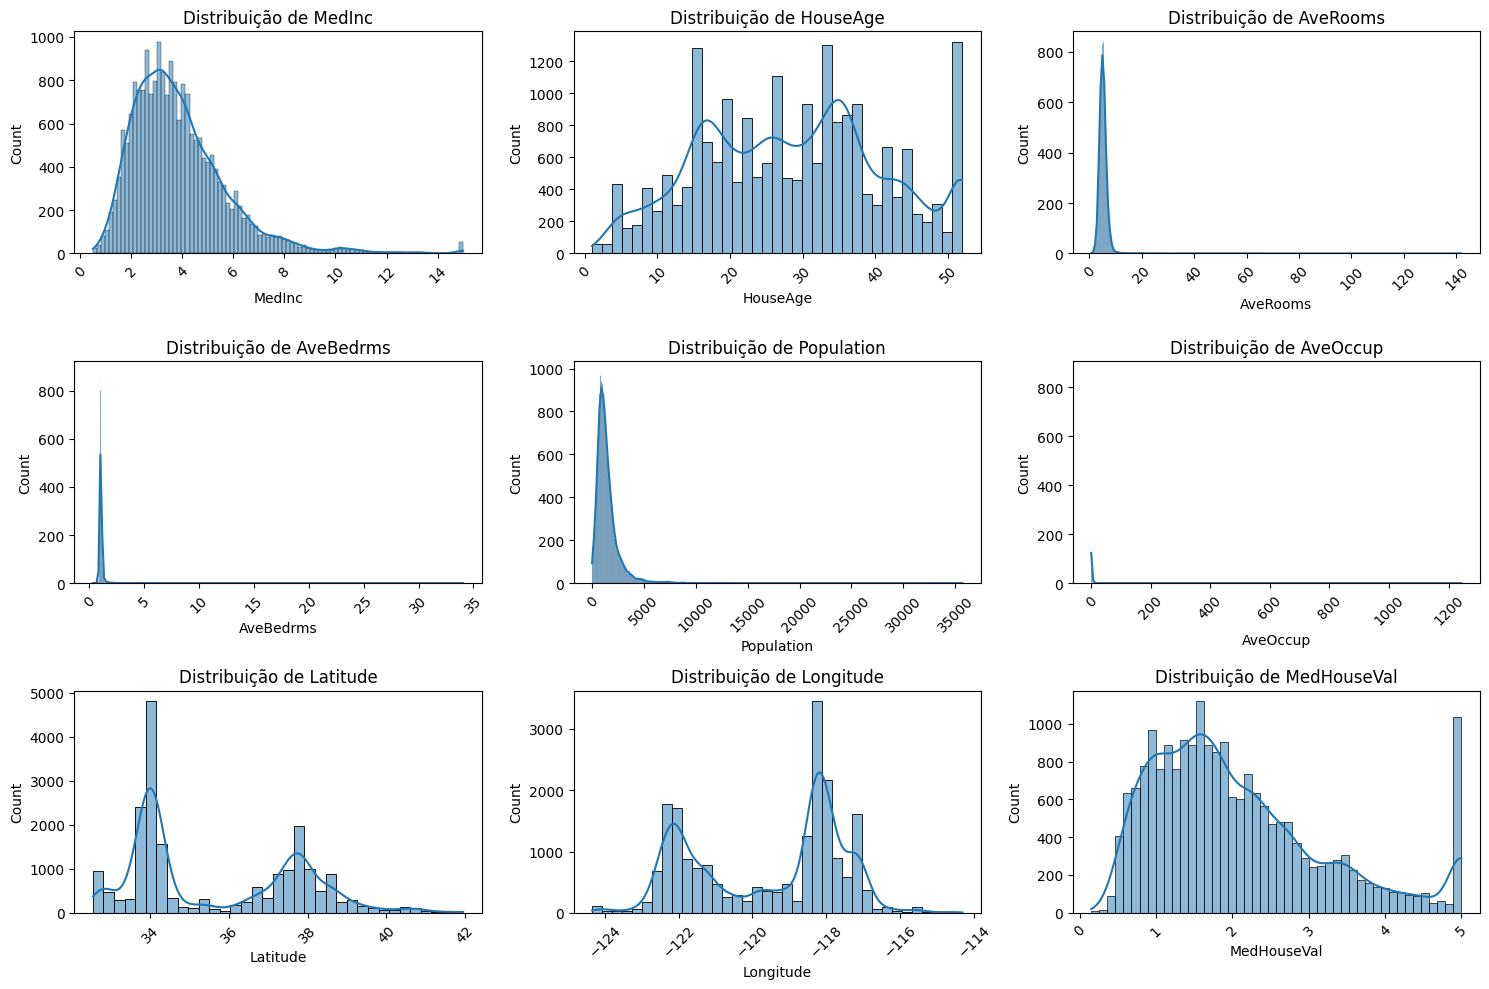

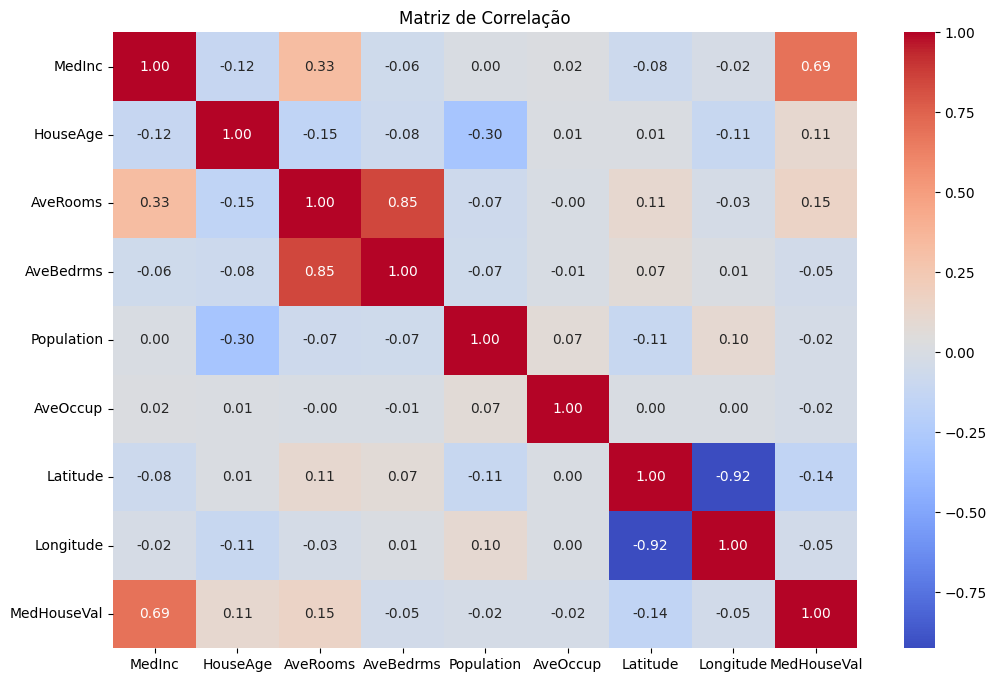

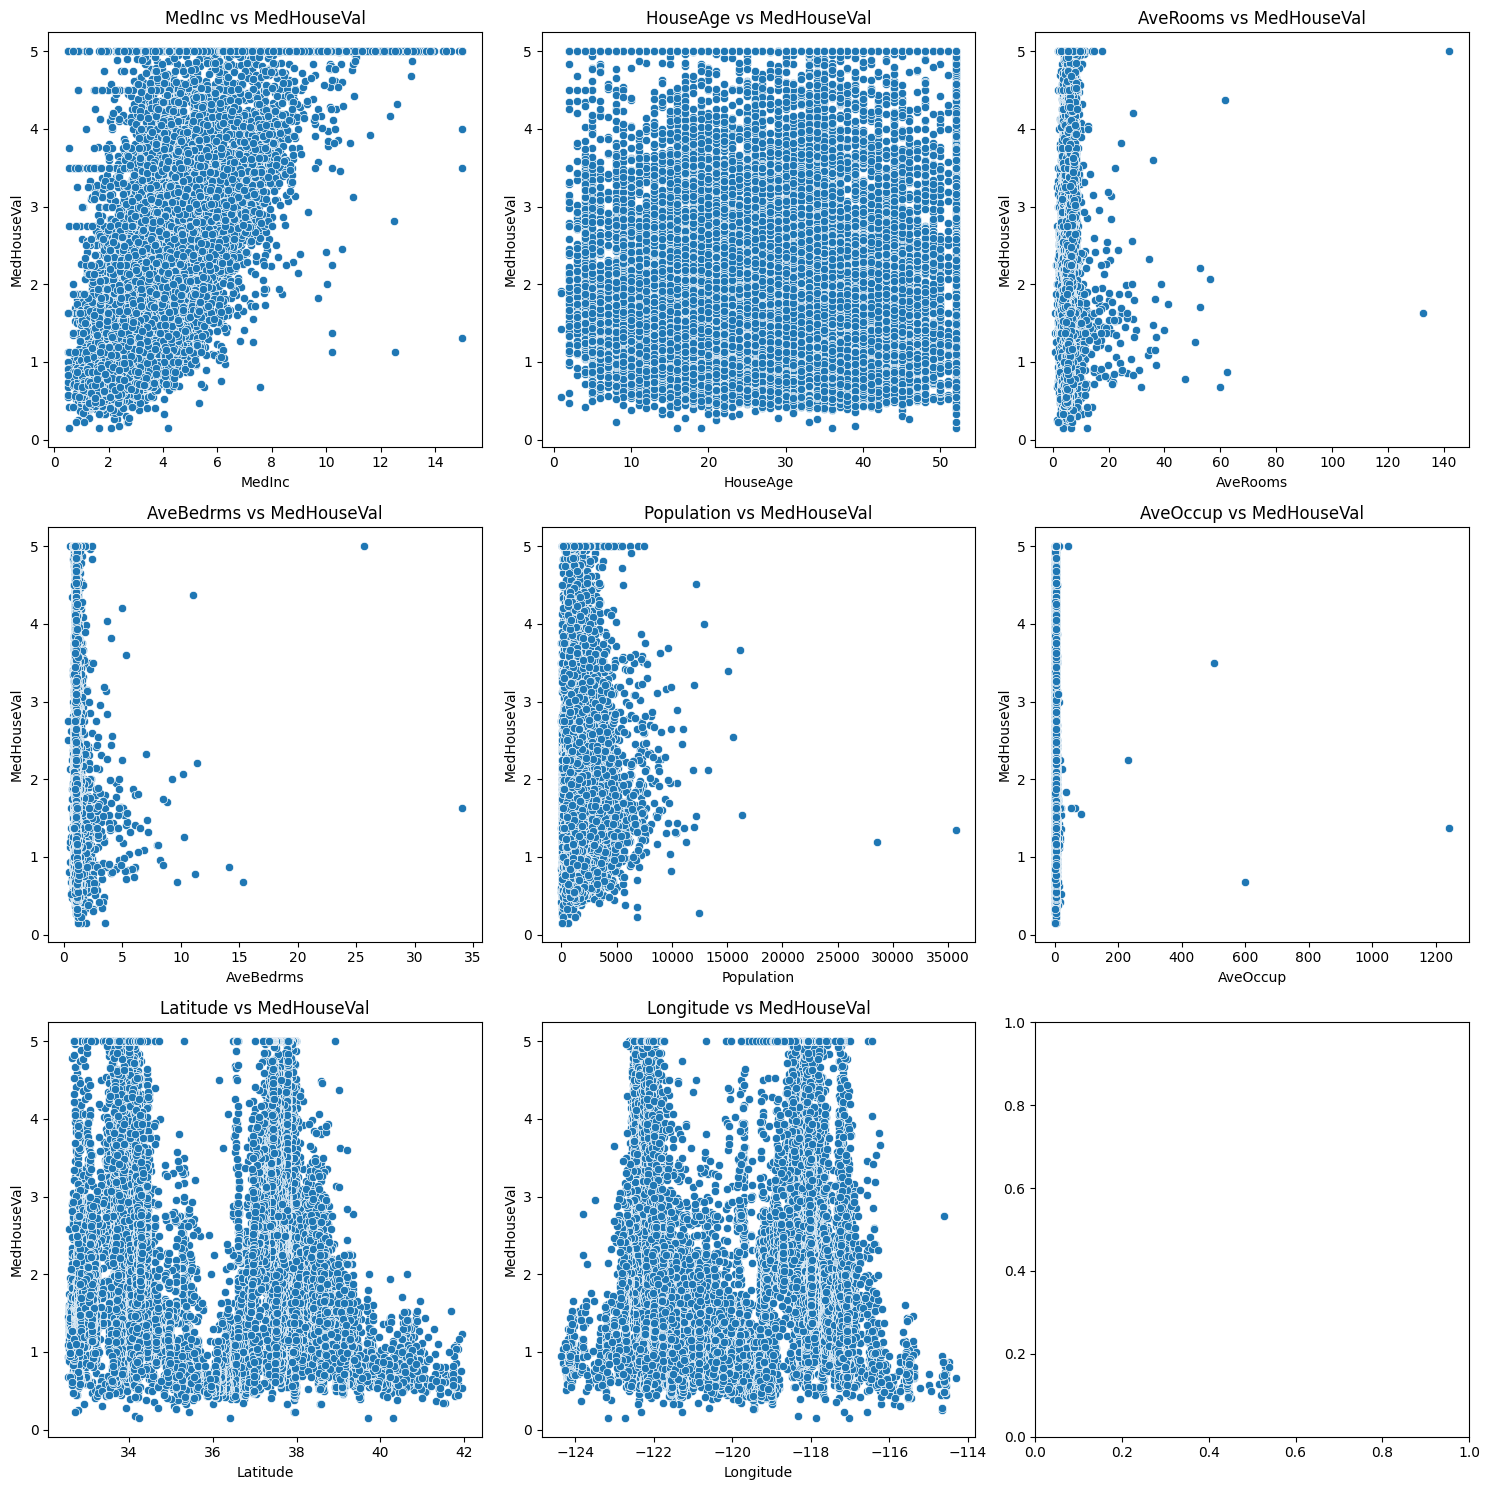

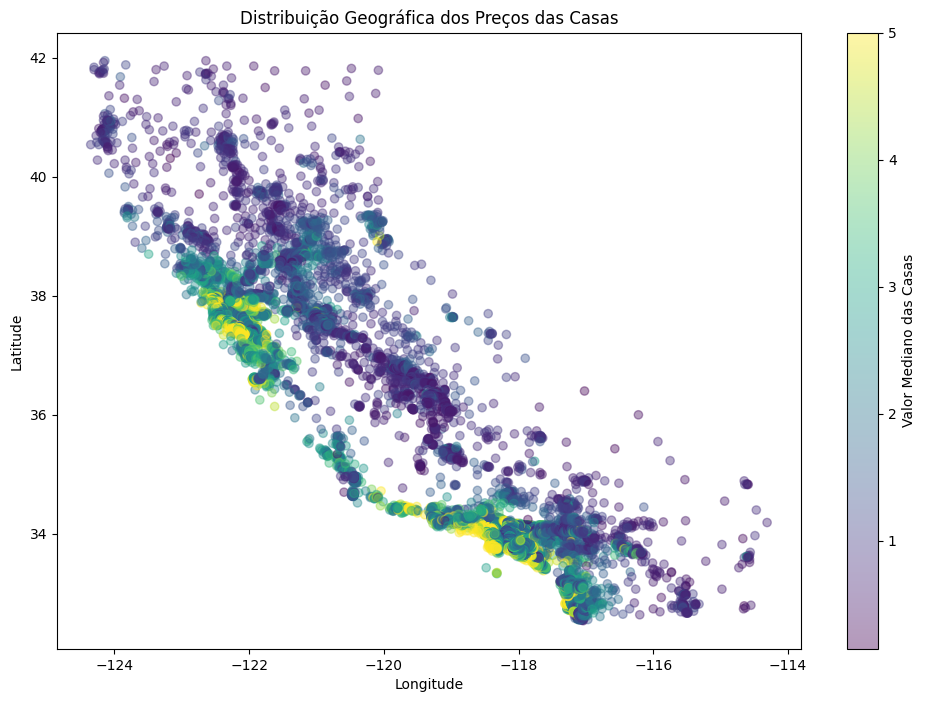


2. Pré-processamento dos Dados

Dimensões dos conjuntos de dados:
X_train: (16512, 8)
X_test: (4128, 8)

3. Treinamento e Avaliação dos Modelos

Treinando Linear Regression...
R² CV: 0.6115 (+/- 0.0129)
RMSE: 0.7456
MAE: 0.5332
R² Test: 0.5758


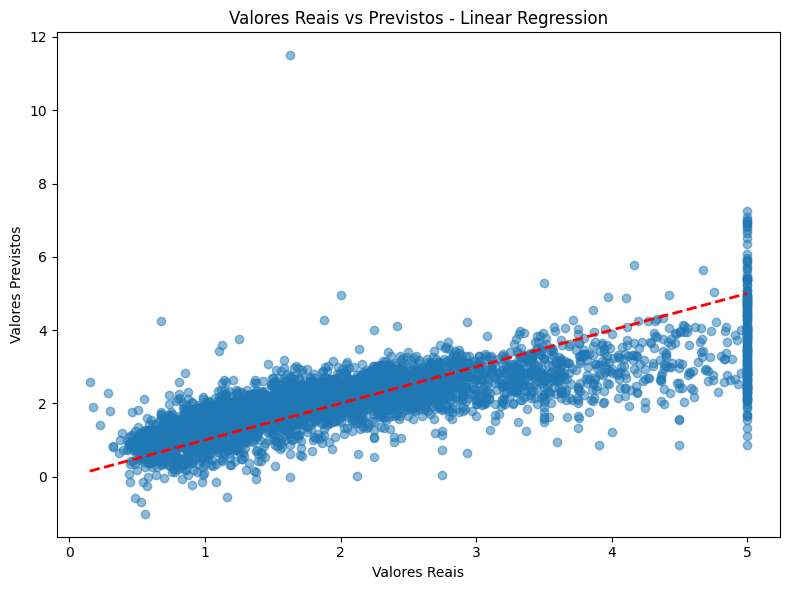


Treinando Decision Tree...
R² CV: 0.6071 (+/- 0.0469)
RMSE: 0.7028
MAE: 0.4539
R² Test: 0.6230


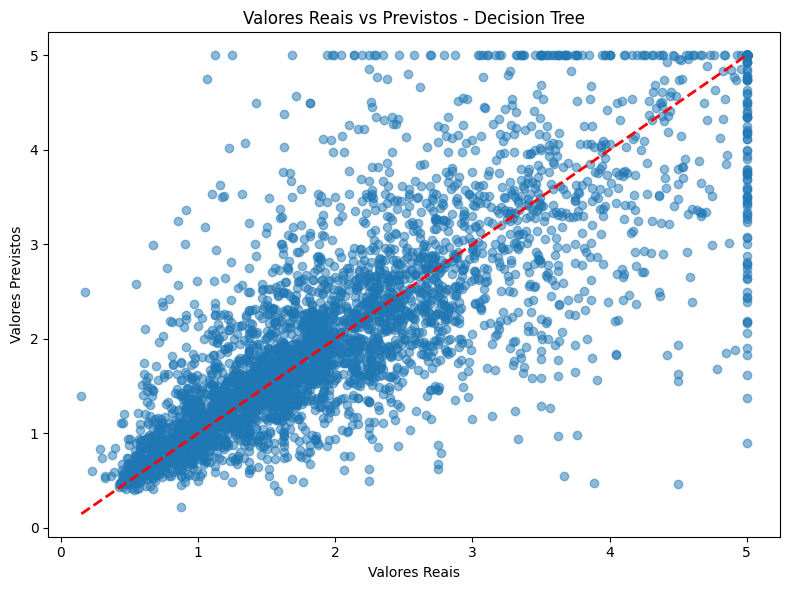


Treinando Random Forest...
R² CV: 0.8042 (+/- 0.0106)
RMSE: 0.5051
MAE: 0.3274
R² Test: 0.8053


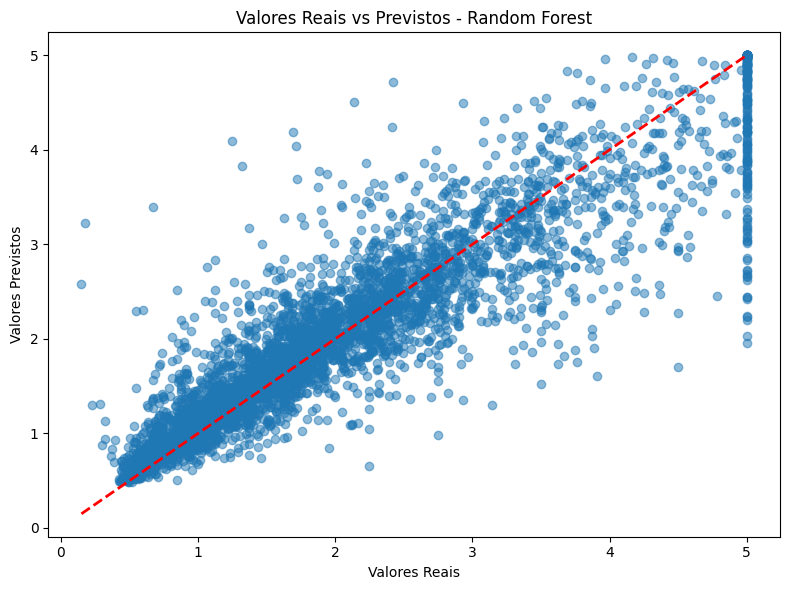


Treinando SVR...
R² CV: 0.7368 (+/- 0.0096)
RMSE: 0.5975
MAE: 0.3986
R² Test: 0.7276


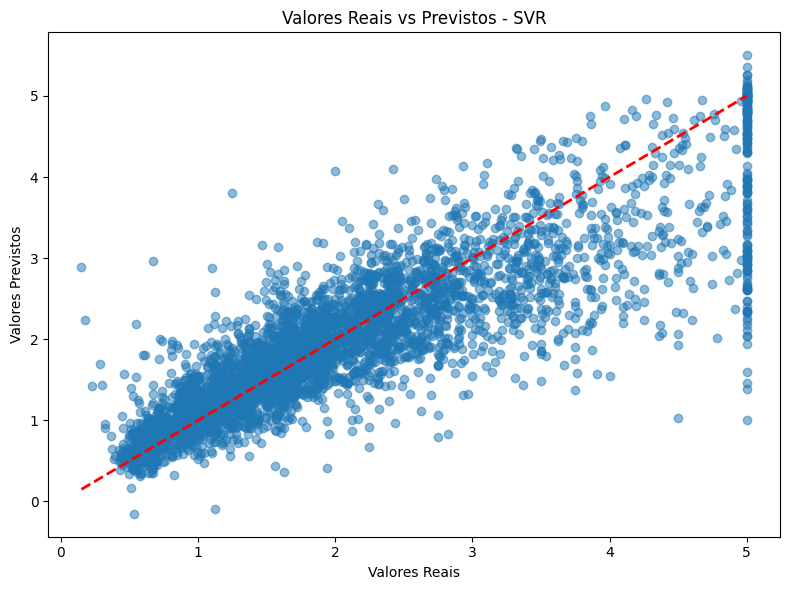


Treinando Gradient Boosting...
R² CV: 0.7866 (+/- 0.0064)
RMSE: 0.5422
MAE: 0.3717
R² Test: 0.7756


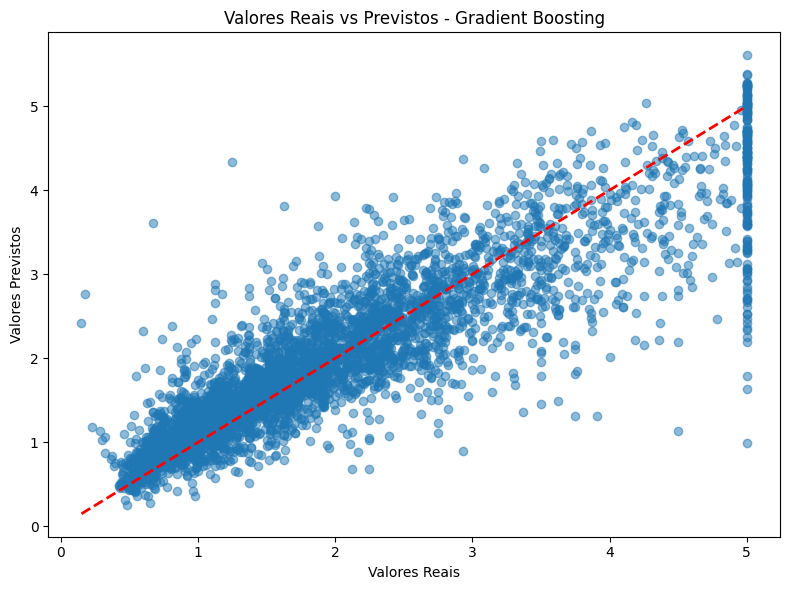


Treinando XGBoost...
R² CV: 0.8300 (+/- 0.0120)
RMSE: 0.4718
MAE: 0.3096
R² Test: 0.8301


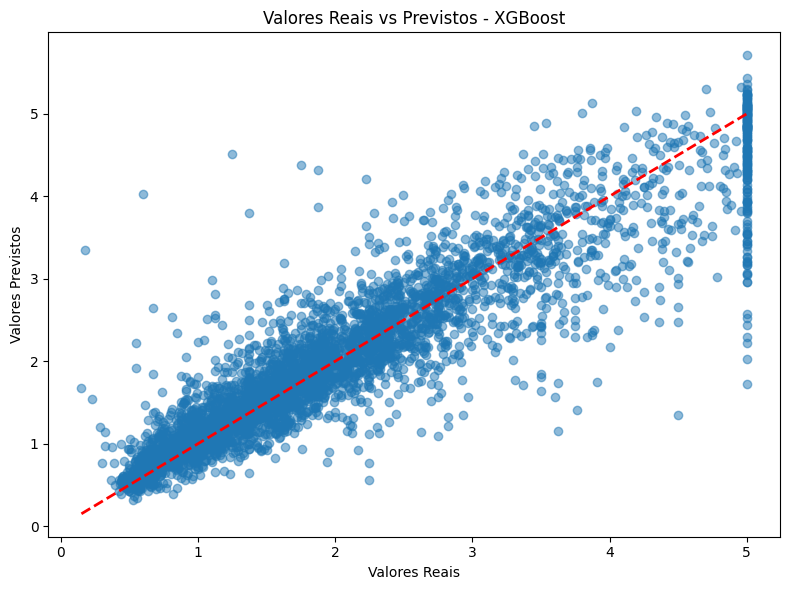


Melhor modelo: XGBoost

4. Análise de Importância das Features


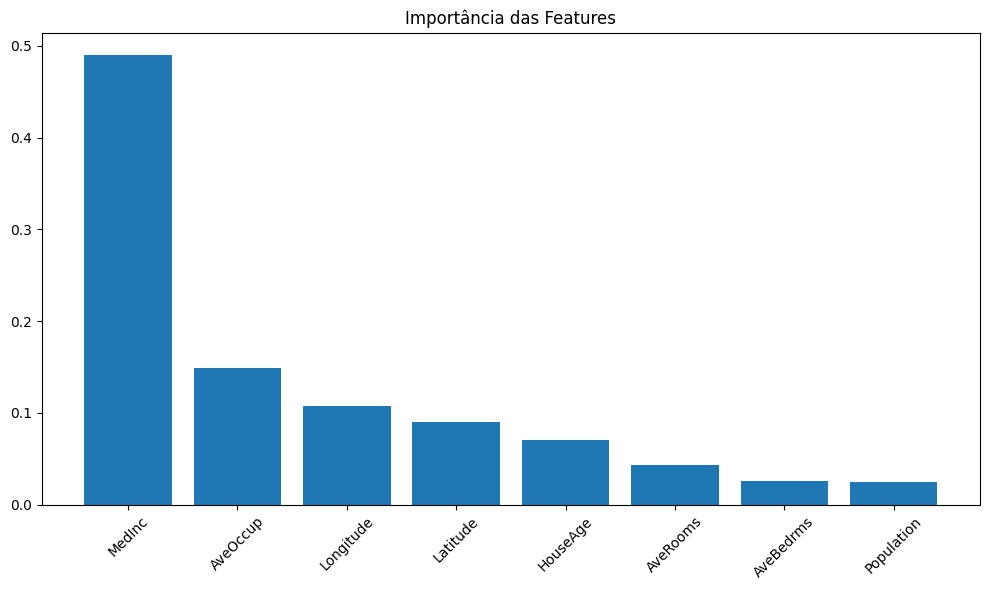


Importância das features:
MedInc: 0.4896
AveOccup: 0.1486
Longitude: 0.1080
Latitude: 0.0903
HouseAge: 0.0701
AveRooms: 0.0431
AveBedrms: 0.0257
Population: 0.0247

5. Análise de Resíduos


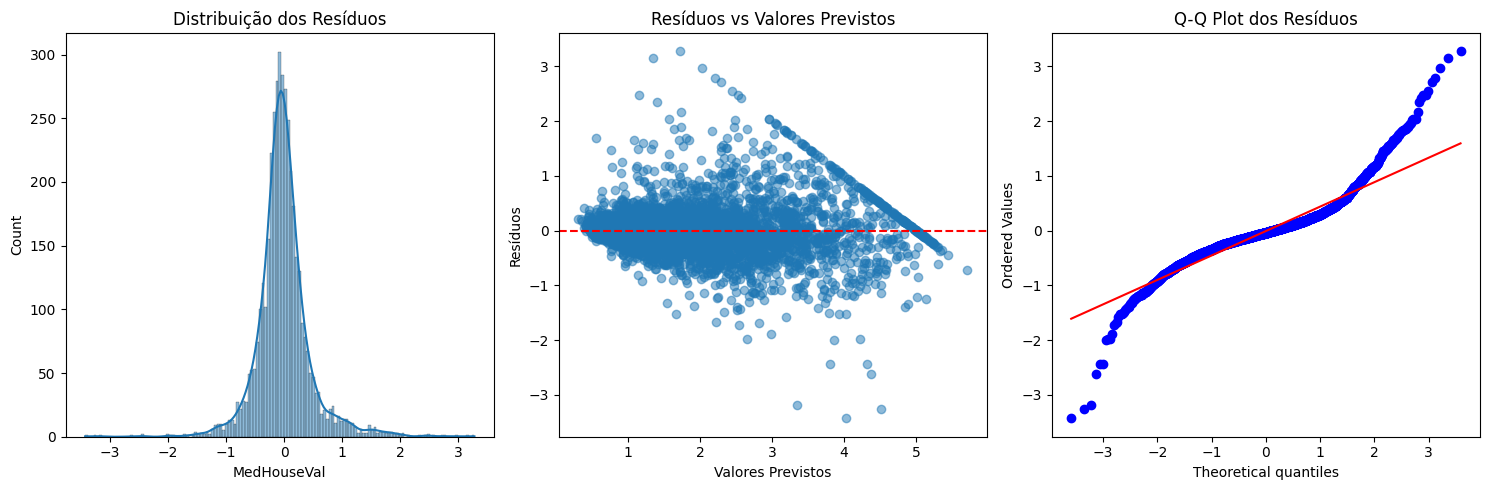

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # Adicionado XGBoost
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def load_and_explore_data():
    """Carrega e realiza análise exploratória detalhada dos dados"""
    print("1. Análise Exploratória de Dados (EDA)")

    # Carregamento dos dados
    url = 'https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/main/california/california_housing.csv'
    df = pd.read_csv(url)
    print("\nDimensões do dataset:", df.shape)

    # Informações básicas
    print("\nInformações do dataset:")
    print(df.info())

    # Estatísticas descritivas
    print("\nEstatísticas descritivas:")
    print(df.describe())

    # Verificação de valores ausentes
    print("\nValores ausentes por coluna:")
    print(df.isnull().sum())

    # Distribuições univariadas
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(df.columns):
        plt.subplot(3, 3, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribuição de {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Matriz de correlação
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Matriz de Correlação')
    plt.show()

    # Scatter plots da variável target vs features
    features = [col for col in df.columns if col != 'MedHouseVal']
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    for i, feature in enumerate(features):
        row = i // 3
        col = i % 3
        sns.scatterplot(data=df, x=feature, y='MedHouseVal', ax=axes[row, col])
        axes[row, col].set_title(f'{feature} vs MedHouseVal')
    plt.tight_layout()
    plt.show()

    # Mapa de localização das casas
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(df['Longitude'], df['Latitude'],
                         c=df['MedHouseVal'], cmap='viridis',
                         alpha=0.4)
    plt.colorbar(scatter, label='Valor Mediano das Casas')
    plt.title('Distribuição Geográfica dos Preços das Casas')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    return df

def preprocess_data(df):
    """Realiza o pré-processamento completo dos dados"""
    print("\n2. Pré-processamento dos Dados")

    # Separando features e target
    X = df.drop('MedHouseVal', axis=1)
    y = df['MedHouseVal']

    # Split dos dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalização
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("\nDimensões dos conjuntos de dados:")
    print(f"X_train: {X_train_scaled.shape}")
    print(f"X_test: {X_test_scaled.shape}")

    return X_train_scaled, X_test_scaled, y_train, y_test, X.columns

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """Treina e avalia diferentes modelos de regressão"""
    print("\n3. Treinamento e Avaliação dos Modelos")

    # Definição dos modelos
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'SVR': SVR(kernel='rbf'),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42)
    }

    results = {}
    for name, model in models.items():
        print(f"\nTreinando {name}...")

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

        # Treino e avaliação
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Métricas
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {
            'CV_R2_mean': cv_scores.mean(),
            'CV_R2_std': cv_scores.std(),
            'Test_MSE': mse,
            'Test_RMSE': np.sqrt(mse),
            'Test_MAE': mae,
            'Test_R2': r2,
            'model': model
        }

        print(f"R² CV: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
        print(f"RMSE: {np.sqrt(mse):.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R² Test: {r2:.4f}")

        # Gráfico de valores previstos vs reais
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.xlabel('Valores Reais')
        plt.ylabel('Valores Previstos')
        plt.title(f'Valores Reais vs Previstos - {name}')
        plt.tight_layout()
        plt.show()

    return results

def analyze_feature_importance(best_model, feature_names):
    """Analisa a importância das features para o melhor modelo"""
    print("\n4. Análise de Importância das Features")

    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title('Importância das Features')
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
        plt.tight_layout()
        plt.show()

        print("\nImportância das features:")
        for i in indices:
            print(f"{feature_names[i]}: {importances[i]:.4f}")

    elif hasattr(best_model, 'coef_'):
        coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': best_model.coef_})
        coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)

        plt.figure(figsize=(10, 6))
        plt.bar(coefficients['Feature'], coefficients['Coefficient'])
        plt.xticks(rotation=45)
        plt.title('Coeficientes do Modelo')
        plt.tight_layout()
        plt.show()

        print("\nCoeficientes do modelo:")
        for _, row in coefficients.iterrows():
            print(f"{row['Feature']}: {row['Coefficient']:.4f}")

def analyze_residuals(best_model, X_test, y_test):
    """Analisa os resíduos do melhor modelo"""
    print("\n5. Análise de Resíduos")

    y_pred = best_model.predict(X_test)
    residuals = y_test - y_pred

    plt.figure(figsize=(15, 5))

    # Distribuição dos resíduos
    plt.subplot(131)
    sns.histplot(residuals, kde=True)
    plt.title('Distribuição dos Resíduos')

    # Resíduos vs Valores Previstos
    plt.subplot(132)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Resíduos')
    plt.title('Resíduos vs Valores Previstos')

    # Q-Q Plot
    plt.subplot(133)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot dos Resíduos')

    plt.tight_layout()
    plt.show()

def main():
    # 1. Carregamento e EDA
    df = load_and_explore_data()

    # 2. Pré-processamento
    X_train, X_test, y_train, y_test, feature_names = preprocess_data(df)

    # 3. Modelagem e Avaliação
    results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    # 4. Identificação do melhor modelo
    best_model_name = max(results.items(), key=lambda x: x[1]['Test_R2'])[0]
    best_model = results[best_model_name]['model']
    print(f"\nMelhor modelo: {best_model_name}")

    # 5. Análise do melhor modelo
    analyze_feature_importance(best_model, feature_names)
    analyze_residuals(best_model, X_test, y_test)

if __name__ == "__main__":
    main()